In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables (use either prepare function based on your version of SQLAlchemy)

# Option 1:
# Base.prepare(autoload_with=engine)

# Option 2:
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [11]:
def str_to_date(in_string):
# Convert a date stored as a string from the database
# and convert it to a datetime object.
# Input string format: YYY-MM-DD
    out_date = dt.datetime.strptime(in_string, '%Y-%m-%d')
    return dt.date(out_date.year, out_date.month, out_date.day)

In [38]:
# Find the most recent date in the data set.
from sqlalchemy import desc
most_recent_date_string = session.query(measurement).order_by(desc(measurement.date)).first().date

# Convert string to datetime
most_recent_date = str_to_date(most_recent_date_string)

# Print most recent date in the dataset
print(f"Most recent date in measurement table: {most_recent_date}")

# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. Calculate the date one year from the last date in data set.
most_recent_date_plus_1y = dt.date(most_recent_date.year - 1, most_recent_date.month, most_recent_date.day)
print(f"One year from most recent date: {most_recent_date_plus_1y}")

Most recent date in measurement table: 2017-08-23
One year from most recent date: 2016-08-23


In [39]:
# Query the data ordered by date in descending order (most recent to least recent)
measurement_new_to_old = session.query(measurement).order_by(desc(measurement.date))

# Create empty lists
dates = []
prcps = []

# Loop through the measurements
for row in measurement_new_to_old:
    # Convert date to datetime
    row_date = str_to_date(row.date)
    
    # If the date is more recent than the limit date (1 year from most recent date)
    # and the precipitations values are not null...
    if (row_date >= most_recent_date_plus_1y) & (type(row.prcp) == float):
        # ... then append the data to the lists
        dates.append(row_date)
        prcps.append(row.prcp)


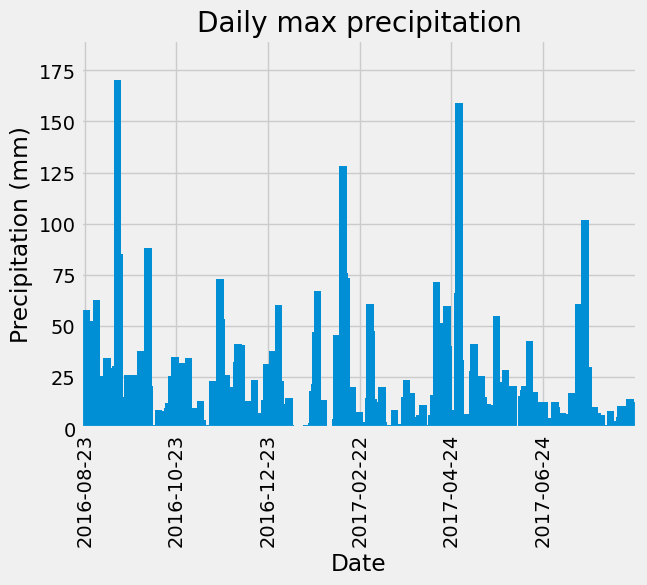

In [81]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurements_df = pd.DataFrame({'Date': dates, 'Precipitations': prcps})

# Group by date and calculate the maximum precipitation
max_prcp_per_month = measurements_df.groupby('Date').max()

# Number of ticks
N = 6

# Ticks range and locations
L = len(max_prcp_per_month)
x_axis = [i*L/N for i in range(N)]
tick_location = [max_prcp_per_month.iloc[int(x)].name for x in x_axis]

# Plot the precipitations per day
max_prcp_per_month.plot.bar(width=5, ylabel='Precipitation (mm)', legend = False, title = 'Daily max precipitation')
plt.xticks(x_axis, tick_location,rotation=90)
plt.ylim(0,190)
plt.show()

In [83]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurements_df.describe()

,Precipitations
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 4.183333333333314, 'Temperature')

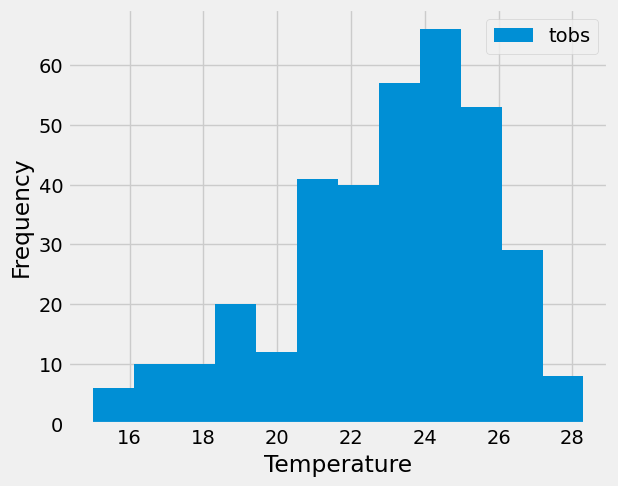

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [14]:
# Close Session
session.close()